# Pen and Paper

## Given the following decision tree learnt from 20 observation using Shannon entropy, with leaf annotations (#correct/#total)

![Decision Tree](./decision_tree.png)

### 1) Draw the training confusion matrix

$$
\begin{matrix}
 &  &  & True &  & \\
 &  & Positive &  & Negative & \\
 & Positive & 8 &  & 4 & 12\\
Predicted &  &  &  &  & \\
 & Negative & 3 &  & 5 & 8\\
 &  &  &  &  & \\
 &  & 11 &  & 9 & 13
\end{matrix}
$$

### 2) Identify the training F1 after a post-pruning of the given tree under a maximum depth of 1.

$$
\begin{matrix}
 &  &  & True &  & \\
 &  & Positive &  & Negative & \\
 & Positive & 5 &  & 2 & 7\\
Predicted &  &  &  &  & \\
 & Negative & 6 &  & 7 & 13\\
 &  &  &  &  & \\
 &  & 11 &  & 9 & 12
\end{matrix}
$$

In [22]:
P = 5 / 7
R = 5 / 11

F = (1/2*(1/P + 1/R))** (-1)

F

0.5555555555555556

### 3) Identify two different reasons as to why the left tree path was not further decomposed.

### 4) Compute the information gain of variable y1

In [23]:
from math import log2

pos_ratio = 11 / 20

neg_ratio = 9 / 20

A_ratio = 7 / 20

B_ratio = 13 / 20

A_Positive_Ratio = 5 / 7

A_Negative_Ratio = 2 / 7

B_Positive_Ratio = 6 / 13

B_Negative_Ratio = 7 / 13

E_y_out = -pos_ratio * log2(pos_ratio) - neg_ratio * log2(neg_ratio)

E_y_out_y1 = A_ratio * (
    -A_Positive_Ratio * log2(A_Positive_Ratio)
    - A_Negative_Ratio * log2(A_Negative_Ratio)
) + B_ratio * (
    -B_Positive_Ratio * log2(B_Positive_Ratio)
    - B_Negative_Ratio * log2(B_Negative_Ratio)
)

IG = E_y_out - E_y_out_y1

IG

0.043459411134285864

# Programming

## Considering the pd_speech.arff dataset available at the homework tab:

### 1

Using sklearn, apply a stratified 70-30 training-testing split with a fixed seed
(random_state=1), and assess in a single plot the training and testing accuracies of a decision tree
with no depth limits (and remaining default behavior) for a varying number of selected features
in {5,10,40,100,250,700}. Feature selection should be performed before decision tree learning
considering the discriminative power of the input variables according to mutual information
criterion (mutual_info_classif).

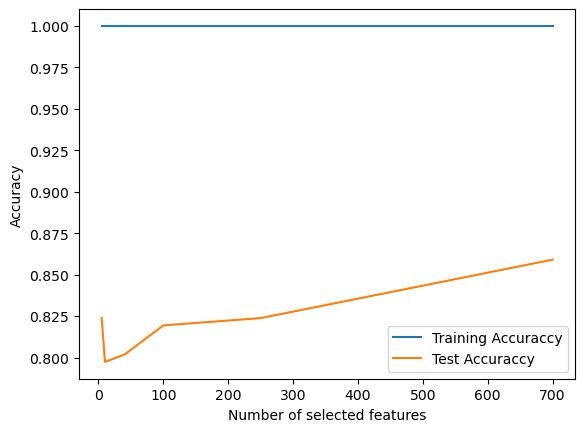

In [24]:
from operator import itemgetter
import pandas as pd
from scipy.io.arff import loadarff
from sklearn import feature_selection, model_selection, tree, metrics, preprocessing
import numpy as np

# Reading the ARFF file
data = loadarff("data/pd_speech.arff")
df = pd.DataFrame(data[0])
df["class"] = df["class"].str.decode("utf-8")

X = df.drop("class", axis=1)
y = df["class"]

mutualInfoClassif = feature_selection.mutual_info_classif(X, y, random_state=1)

values = {}

for i in range(0, len(mutualInfoClassif)):
    values[df.columns[i]] = mutualInfoClassif[i]

values["0"] = 1
values["1"] = 1

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, train_size=0.7, stratify=y, random_state=1
)

NUM_FEATURES = [5, 10, 40, 100, 250, 700]

training_accurancy = []
test_accurancy = []

for num_features in NUM_FEATURES:

    values_sorted = {}
    a = num_features

    for column, info in sorted(values.items(), key=itemgetter(1), reverse=True):
        if a > 0:
            values_sorted[column] = info
        else:
            values_sorted[column] = 0
        a -= 1

    predictor = tree.DecisionTreeClassifier(class_weight=values_sorted)

    predictor.fit(X_train, y_train)

    y_train_pred = predictor.predict(X_train)
    y_test_pred = predictor.predict(X_test)

    train_acc = metrics.accuracy_score(y_train,y_train_pred)
    test_acc = metrics.accuracy_score(y_test,y_test_pred)

    training_accurancy.append(train_acc)
    test_accurancy.append(test_acc)

import matplotlib.pyplot as plt
import seaborn as sns


plt.plot(NUM_FEATURES, training_accurancy, label="Training Accuraccy")
plt.plot(NUM_FEATURES, test_accurancy, label="Test Accuraccy")

plt.xlabel("Number of selected features")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

### 2

Why training accuracy is persistently 1? Critically analyze the gathered results